# Question

1. Use SDSS DR18 SQL search to find all galaxies which have only the narrow emission lines
(FWHM<500 km/s), high median signal to noise ratio in g band (S/N>40), and fluxes of lines:
[O III] 5007, Hβ, Hα and [N II] 6583 larger than 5 e-17 erg/s/cm^2. Set criteria so that the
fluxes are larger than errors in flux multiplied with 5 in order to get good results. SQL output
should be the fluxes of these lines.


2. For the obtained sample make the diagnostic BPT (Baldwin, Philips and Terlevich) diagram.
This diagram determines the dominant ionization source for the objects: accretion disk (AGN)
or hot emission stars (H II - star-burst region). For the BPT diagram use the flux ratios of the
lines: [O III] 5007/Hβ vs. [N II]6583/Hα.
For the separation curves use the theoretical curve from the paper Kewley et al. 2001, ApJ, 556, 121
(dot line in the graph) and empirical curve from the paper Kauffmann et al. 2003, MNRAS, 346, 1055
(dashed line in the graph).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/home/sagarika/belgrade/agn/mass-agn-main/Homework 4/Skyserver_SQL4_21_2023 12 41 50 PM.csv')
df    #SDSS data set 

,plate,mjd,fiberid,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux
0,285,51930,348,2402.94400,3685.00800,13171.20000,3451.3950
1,291,51928,323,176.95500,55.05654,249.51120,133.6092
2,434,51885,119,24.81091,17.75634,93.27818,98.9289
3,488,51914,370,31.79686,57.48275,331.43390,142.6109
4,552,51992,67,82.09850,38.93745,139.24960,221.4858
...,...,...,...,...,...,...,...
978,1997,53442,131,571.04570,1213.01700,5363.94700,4444.1650
979,2419,54139,94,1000.86600,974.88070,3278.34500,907.5422
980,2520,54584,378,162.77620,31.01513,161.46710,161.9441
981,2608,54474,537,71.02692,72.81252,188.71430,188.4868


In [3]:
r_nii_ha=df['nii_6584_flux']/df['h_alpha_flux']   #Line ratio of [NII]/Hα

In [4]:
r_oiii_hb=df['oiii_5007_flux']/df['h_beta_flux']    #Line ratio of [OIII]/Hβ

In [5]:
#plt.scatter(np.log10(r_nii_ha),np.log10(r_oiii_hb) )

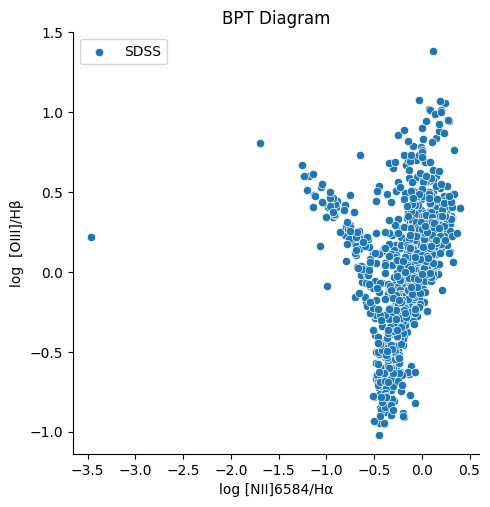

In [6]:
sns.relplot( data=df, x=np.log10(r_nii_ha), y=np.log10(r_oiii_hb), label='SDSS')
plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")
plt.legend()

Text(0.5, 1.0, 'Kewley et al. 2001 relation')

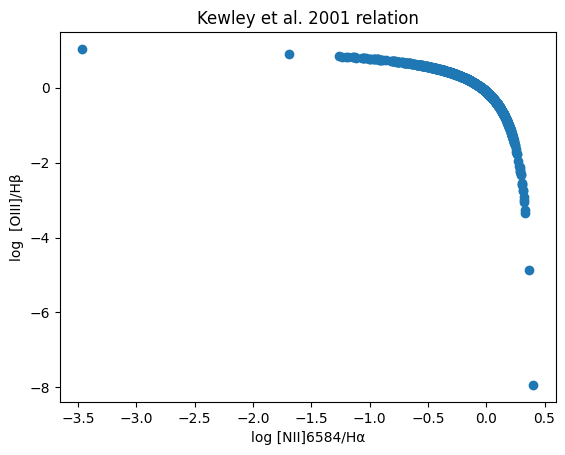

In [7]:
#np.log10(r_oiii_hb)=(0.61/(np.log10(r_nii_ha)-0.47)) +1.19
#from https://arxiv.org/pdf/astro-ph/0106324.pdf  Kewley et al 2001

y=(0.61/(np.log10(r_nii_ha)-0.47)) +1.19

plt.scatter(np.log10(r_nii_ha),y)



#Plotting the relation

plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("Kewley et al. 2001 relation")


Text(0.5, 1.0, 'Kauffmann et al. 2003 relation')

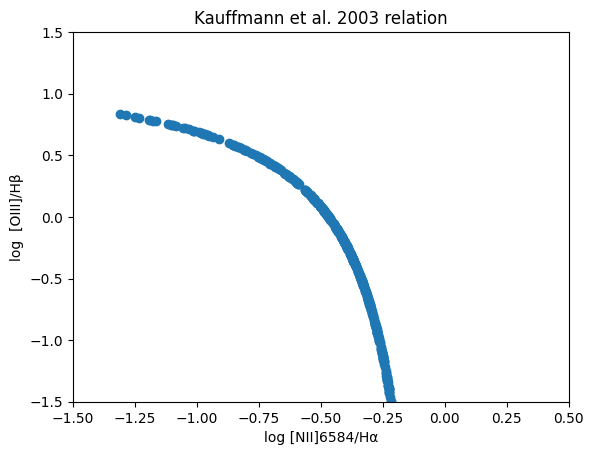

In [8]:
#from https://arxiv.org/pdf/astro-ph/0304239.pdf  'Kauffmann et al. 2003'
y1=(0.61/(np.log10(r_nii_ha)-0.05)) +1.3
plt.scatter((np.log10(r_nii_ha)-0.05),y1)#np.log10(y1))


plt.xlim(-1.5,0.5)
plt.ylim(-1.5,1.5)

plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("Kauffmann et al. 2003 relation")


# Plotting the BPT diagram 

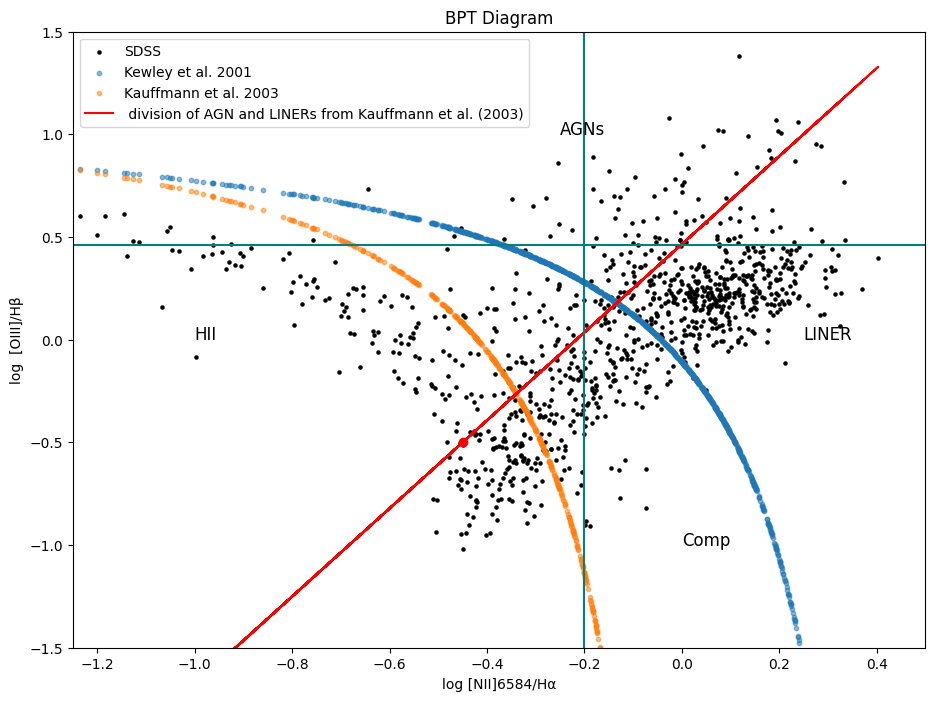

In [9]:
plt.figure(figsize=(11,8))

plt.scatter(np.log10(r_nii_ha),np.log10(r_oiii_hb), label='SDSS' , color='black',s=5)
plt.scatter(np.log10(r_nii_ha),(y), label='Kewley et al. 2001', s=10, alpha=0.5)
plt.scatter(np.log10(r_nii_ha),(y1), label= 'Kauffmann et al. 2003',s=10, alpha=0.5)

#I have attempted to plot the line that demarcates seyferts from LINERS, directions for which is given in the 
#Kaufmann et al. 2003 paper as follows.

#We propose the following simple scheme for characterizing the
#position of an emission-line galaxy on the BPT diagram of Fig. 1. We
#define an ‘origin’ O located at [NII]/Ha = -0.45 and [Oiii]/Hb =
#—0.5, i.e. near the bottom of the locus of star-forming galaxies where
#it intersects the lower end of the AGN sequence. We then parametrize
#the position of each galaxy by its distance D from the origin O,
#and by an angle O, which is defined to be zero in the direction
#parallel to the positive [Oiii]/Hb axis, and which increases as the
#galaxy moves in a clockwise direction towards increasing values of
#[N ii]/Ha: and decreasing values of [Oii]/Hb. In this scheme, pure
#Seyferts are characterized by large values of D and small values
#of d> (0°-25degree), whereas ‘pure’ LINERs are characterized by large
#values of D and values of O in the range 25degree-60°. Transition objects
#are characterized by small values of D.

plt.scatter(-0.45,-0.5,c='r') #origin as mentioned above


# Specify angle of the line in degrees
angle_degrees = 65    #(90-25=65)

# Convert angle to radians
angle_radians = np.radians(angle_degrees)


m = np.tan(angle_radians)
y_a = (m*(np.log10(r_nii_ha)+0.45)-0.5)
plt.plot(np.log10(r_nii_ha),y_a, c='red', label=' division of AGN and LINERs from Kauffmann et al. (2003)')

#I could not terminate the point at the origin. But it should be a straight line that starts from the red point
#marked as the center. 

plt.axhline(y=0.46, color='teal')#, linestyle='--')
plt.axvline(x=-0.2, color='teal')#, linestyle='--')

plt.xlim(-1.25,0.5)
plt.ylim(-1.5,1.5)

plt.text( 0.0,-1.0, 'Comp',fontsize=12)
plt.text( 0.25,0.0, 'LINER',fontsize=12)
plt.text( -0.25,1.0, 'AGNs',fontsize=12)
plt.text( -1.0,0.0, 'HII',fontsize=12)

plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")
plt.legend()

# Question

1. For the sample of galaxies selected from SDSS database in Part I, find the corresponding WISE
colors. Adapt the following query example to find WISE fluxes needed for obtaining colors:
https://skyserver.sdss.org/dr16/en/help/docs/realquery.aspx#wisexmatch
    
    
2. Assign classes (AGN & (u)LIRGS, Spheroids, Intermediate disks and SF disks) to all objects in
the sample using the thresholds from the image on the bottom right (dashed lines). How do
these classes compare to ones obtained using BPT diagram from Part I?


3. Locate one random object on the WISE color-color plot having W1–W2>=0.8 (Assef et al.
2013) and address the following:
- Where is the object located in this plot? Mark it clearly on the graph.
- Does it agree with the optical classification from BPT diagram?
- Draw some conclusions about the type of AGN using the WISE color-color plot

In [10]:
df2=pd.read_csv('/home/sagarika/belgrade/agn/mass-agn-main/Homework 4/Skyserver_CrossID4_22_2023 7 06 38 PM.csv')
df2=df2.dropna()
df2                        #Crossmatched data with W1, W2 and W3 magnitudes

,plate,mjd,fiberid,w1mpro,w2mpro,w3mpro
0,2529,54585,629,11.871,11.859,9.422
1,2172,54230,577,12.093,11.704,7.413
2,308,51662,191,10.203,10.221,8.550
3,1378,53061,388,12.553,12.085,8.093
4,1314,53050,421,12.026,11.961,8.714
...,...,...,...,...,...,...
964,407,51820,565,11.543,11.562,8.706
965,581,52356,40,10.996,11.047,8.609
966,2231,53816,393,10.964,11.027,9.879
967,2004,53737,313,11.446,11.531,10.925


In [11]:
df3 = pd.merge(df, df2, on=['plate', 'mjd', 'fiberid'])
df3 =df3.dropna()
df3                                  #Merged data

,plate,mjd,fiberid,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux,w1mpro,w2mpro,w3mpro
0,285,51930,348,2402.94400,3685.00800,13171.20000,3451.3950,11.445,11.186,7.348
1,291,51928,323,176.95500,55.05654,249.51120,133.6092,10.395,10.432,9.627
2,434,51885,119,24.81091,17.75634,93.27818,98.9289,11.844,11.898,9.952
3,488,51914,370,31.79686,57.48275,331.43390,142.6109,11.924,11.915,8.715
4,552,51992,67,82.09850,38.93745,139.24960,221.4858,11.051,11.031,8.413
...,...,...,...,...,...,...,...,...,...,...
964,1997,53442,131,571.04570,1213.01700,5363.94700,4444.1650,11.263,10.850,6.091
965,2419,54139,94,1000.86600,974.88070,3278.34500,907.5422,11.728,11.544,7.472
966,2520,54584,378,162.77620,31.01513,161.46710,161.9441,11.964,11.841,9.208
967,2608,54474,537,71.02692,72.81252,188.71430,188.4868,11.555,11.652,10.411


In [12]:
x1=df3['w2mpro']-df3['w3mpro']
y1=df3['w1mpro']-df3['w2mpro']

In [13]:
df4=pd.DataFrame({'w2-w3':x1, 'w1-w2':y1})
df4

,w2-w3,w1-w2
0,3.838,0.259
1,0.805,-0.037
2,1.946,-0.054
3,3.200,0.009
4,2.618,0.020
...,...,...
964,4.759,0.413
965,4.072,0.184
966,2.633,0.123
967,1.241,-0.097


In [14]:
#Classifying the objects in the dataframe based on magnitude


df4['label'] = ''
for i in range(len(df4)):
    if df4['w2-w3'][i] <= 2 and df4['w1-w2'][i] <= 0.8:
        df4['label'][i] = 'spheroids'
    elif df4['w1-w2'][i] > 0.8:
        df4['label'][i] = 'AGNs and u)LIRGS' 
    elif df4['w2-w3'][i] >2 and df4['w2-w3'][i]<3.5 and df4['w1-w2'][i] < 0.8:
        df4['label'][i] = 'Intermediate discs'
    else:
        df4['label'][i] = 'SF disc'
df4    

/tmp/ipykernel_17591/4243671743.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['label'][i] = 'SF disc'
/tmp/ipykernel_17591/4243671743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['label'][i] = 'spheroids'
/tmp/ipykernel_17591/4243671743.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['label'][i] = 'Intermediate discs'
/tmp/ipykernel_17591/4243671743.py:9: SettingWithCopyWarning: 
A value is trying to be s

,w2-w3,w1-w2,label
0,3.838,0.259,SF disc
1,0.805,-0.037,spheroids
2,1.946,-0.054,spheroids
3,3.200,0.009,Intermediate discs
4,2.618,0.020,Intermediate discs
...,...,...,...
964,4.759,0.413,SF disc
965,4.072,0.184,SF disc
966,2.633,0.123,Intermediate discs
967,1.241,-0.097,spheroids


# Plotting the color-color diagram using WISE data

<Figure size 1000x1000 with 0 Axes>

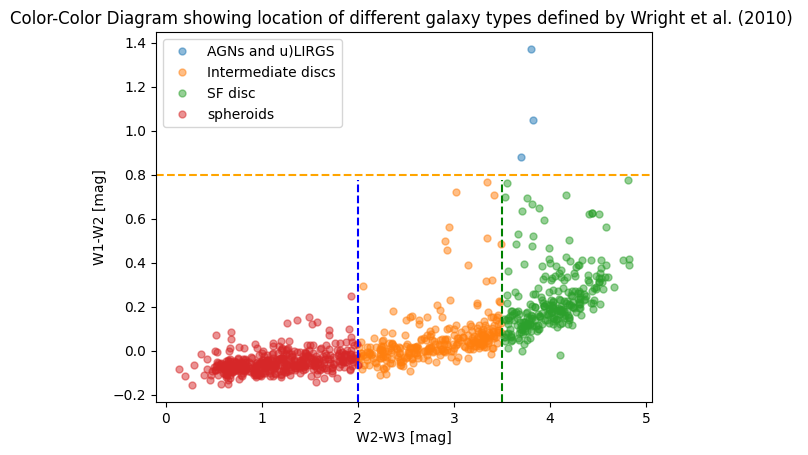

In [15]:
x=df4['w2-w3']
y=df4['w1-w2']
labels=df4['label']

df5 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df5.groupby('label')

# Plot
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
plt.axhline(y=0.8, color='orange', linestyle='--')
plt.axvline(x=2,ymax=0.6, color='blue', linestyle='--')
plt.axvline(x=3.5,ymax=0.6, color='green', linestyle='--')

plt.xlabel("W2-W3 [mag]")
plt.ylabel("W1-W2 [mag]")
plt.title("Color-Color Diagram showing location of different galaxy types defined by Wright et al. (2010) ")

ax.legend()

plt.show()

In [16]:
df6 = pd.concat([df3, df4], axis=1)
df6

,plate,mjd,fiberid,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux,w1mpro,w2mpro,w3mpro,w2-w3,w1-w2,label
0,285,51930,348,2402.94400,3685.00800,13171.20000,3451.3950,11.445,11.186,7.348,3.838,0.259,SF disc
1,291,51928,323,176.95500,55.05654,249.51120,133.6092,10.395,10.432,9.627,0.805,-0.037,spheroids
2,434,51885,119,24.81091,17.75634,93.27818,98.9289,11.844,11.898,9.952,1.946,-0.054,spheroids
3,488,51914,370,31.79686,57.48275,331.43390,142.6109,11.924,11.915,8.715,3.200,0.009,Intermediate discs
4,552,51992,67,82.09850,38.93745,139.24960,221.4858,11.051,11.031,8.413,2.618,0.020,Intermediate discs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1997,53442,131,571.04570,1213.01700,5363.94700,4444.1650,11.263,10.850,6.091,4.759,0.413,SF disc
965,2419,54139,94,1000.86600,974.88070,3278.34500,907.5422,11.728,11.544,7.472,4.072,0.184,SF disc
966,2520,54584,378,162.77620,31.01513,161.46710,161.9441,11.964,11.841,9.208,2.633,0.123,Intermediate discs
967,2608,54474,537,71.02692,72.81252,188.71430,188.4868,11.555,11.652,10.411,1.241,-0.097,spheroids


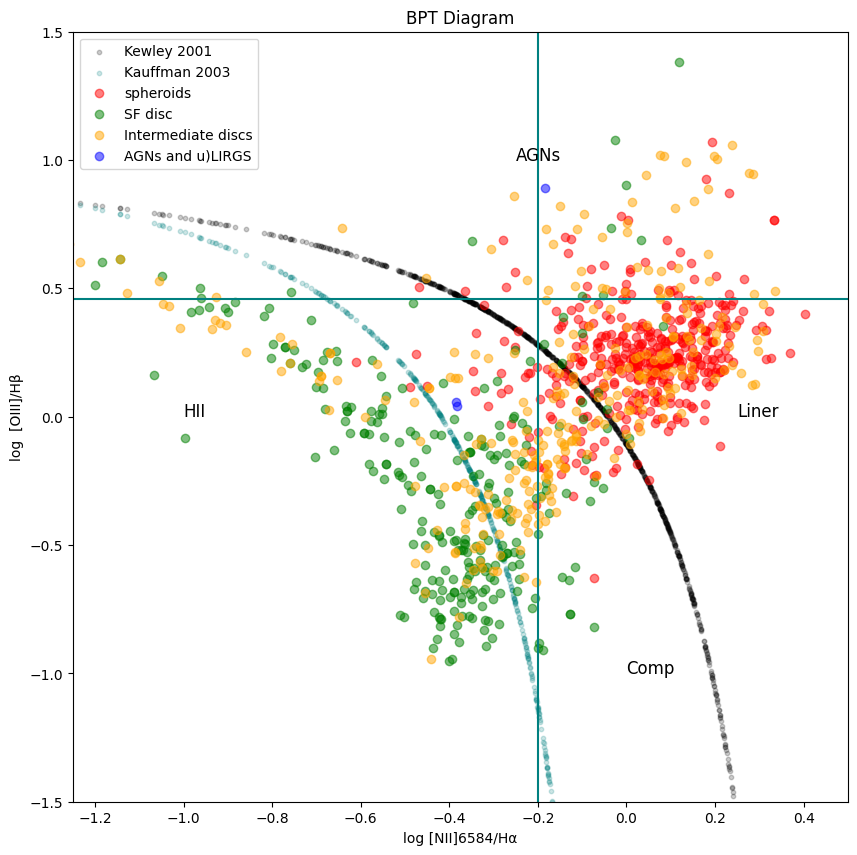

In [17]:
plt.figure(figsize=(10,10))

y7=(0.61/(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux'])-0.47)) +1.19
plt.scatter(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux']),y7, label='Kewley 2001', c='black',s=10, alpha=0.2)
            
y8=(0.61/(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux'])-0.05)) +1.3
plt.scatter(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux']),y8, label='Kauffman 2003', c='teal',s=10, alpha=0.2)#np.log10(y1))



colors = {'spheroids': 'red', 'SF disc': 'green', 'Intermediate discs': 'orange','AGNs and u)LIRGS': 'blue' }

for label, color in colors.items():
    mask = df6['label'] == label
    x6 = np.log10(df6.loc[mask, 'nii_6584_flux'] / df6.loc[mask, 'h_alpha_flux'])
    y6 = np.log10(df6.loc[mask, 'oiii_5007_flux'] / df6.loc[mask, 'h_beta_flux'])
    plt.scatter(x6, y6, c=color, label=label, alpha =0.5)
    

    
plt.axhline(y=0.46, color='teal')#, linestyle='--')
plt.axvline(x=-0.2, color='teal')#, linestyle='--')


plt.text( 0.0,-1.0, 'Comp',fontsize=12)
plt.text( 0.25,0.0, 'Liner',fontsize=12)
plt.text( -0.25,1.0, 'AGNs',fontsize=12)
plt.text( -1.0,0.0, 'HII',fontsize=12)



plt.xlim(-1.25,0.5)
plt.ylim(-1.5,1.5)

plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")

    
    
plt.legend()   

The BPT diagram is the same as the one done in question 1 but here it is colour coded based on the classifaction of WISE mag
This is to make a comparison of classification methods. 

Here we can clearly see that 2 blue points that are classified as AGNs and u)LIRGS by WISE magnitude falls in the 'Comp' region of the BPT diagram

I can approximately see a patter in this graph that a majority of spheroids lie in the LINER region and a majority of SF disc lies in the HII region. 
No clear pattern can be seen in case of intermediate disc structure. 
But this is very crude and approximate.

In [18]:
desired_label = 'AGNs and u)LIRGS'
desired_data = df6.loc[df6['label'] == desired_label]

In [19]:
desired_data  #These are the data points where W1–W2>=0.8

,plate,mjd,fiberid,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux,w1mpro,w2mpro,w3mpro,w2-w3,w1-w2,label
333,2117,54115,351,4433.455,569.2051,2661.47,1745.936,10.131,9.081,5.255,3.826,1.050,AGNs and u)LIRGS
402,952,52409,247,3576.736,3131.9990,14658.14,6027.313,7.766,6.395,2.598,3.797,1.371,AGNs and u)LIRGS
573,1776,53858,632,4133.134,3754.2180,16633.67,6907.328,10.197,9.315,5.619,3.696,0.882,AGNs and u)LIRGS


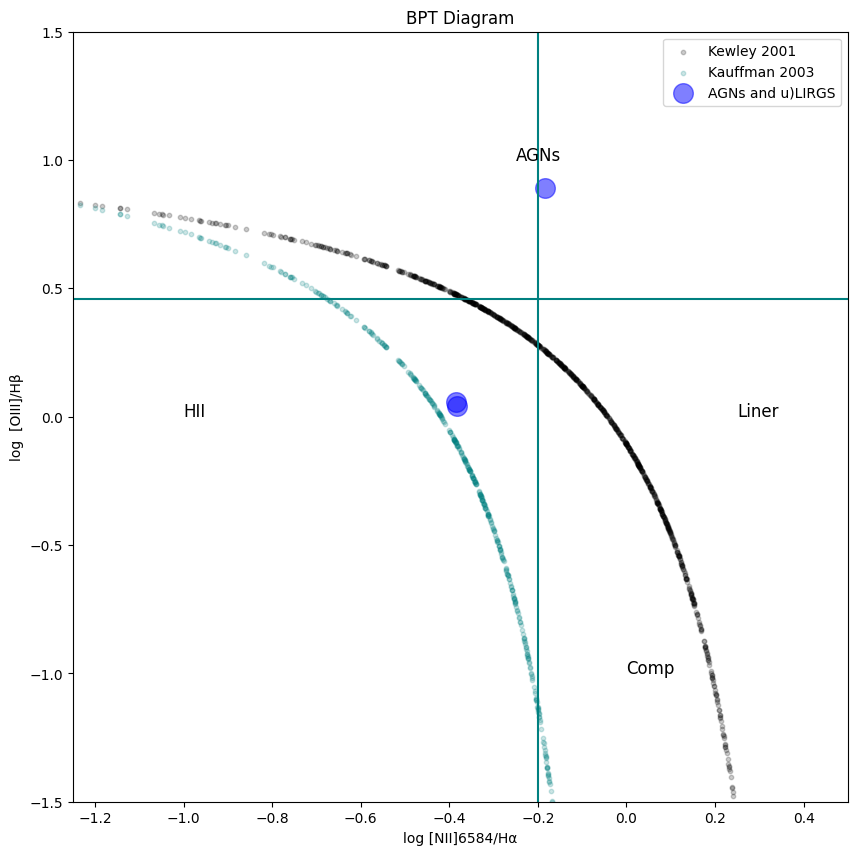

In [20]:
plt.figure(figsize=(10,10))

y7=(0.61/(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux'])-0.47)) +1.19
plt.scatter(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux']),y7, label='Kewley 2001', c='black',s=10, alpha=0.2)
            
y8=(0.61/(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux'])-0.05)) +1.3
plt.scatter(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux']),y8, label='Kauffman 2003', c='teal',s=10, alpha=0.2)#np.log10(y1))

colors = {'AGNs and u)LIRGS': 'blue' }

for label, color in colors.items():
    mask = df6['label'] == label
    x6 = np.log10(df6.loc[mask, 'nii_6584_flux'] / df6.loc[mask, 'h_alpha_flux'])
    y6 = np.log10(df6.loc[mask, 'oiii_5007_flux'] / df6.loc[mask, 'h_beta_flux'])
    plt.scatter(x6, y6, c=color, label=label, s=200, alpha=0.5) 

plt.axhline(y=0.46, color='teal')#, linestyle='--')
plt.axvline(x=-0.2, color='teal')#, linestyle='--')


plt.text( 0.0,-1.0, 'Comp',fontsize=12)
plt.text( 0.25,0.0, 'Liner',fontsize=12)
plt.text( -0.25,1.0, 'AGNs',fontsize=12)
plt.text( -1.0,0.0, 'HII',fontsize=12)



plt.xlim(-1.25,0.5)
plt.ylim(-1.5,1.5)

plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")

    
    
plt.legend()   

# The two graphs below have been plotted before but only a single source is marked here in black.
# In both the diagrams and classification scheme, it is classifed as an AGN

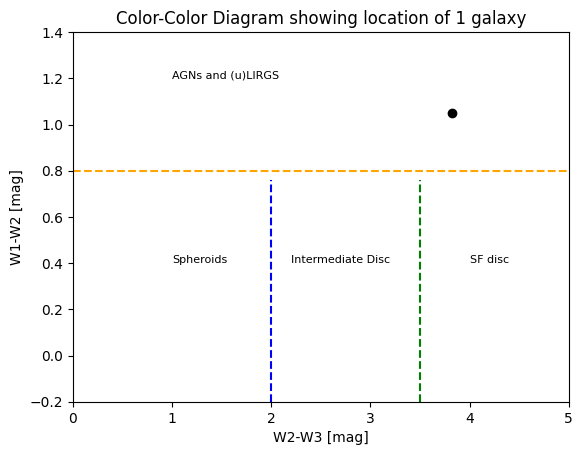

In [21]:


# Plot
plt.scatter(x=3.826, y=1.050, c='black')

plt.axhline(y=0.8, color='orange', linestyle='--')
plt.axvline(x=2,ymax=0.6, color='blue', linestyle='--')
plt.axvline(x=3.5,ymax=0.6, color='green', linestyle='--')

plt.xlabel("W2-W3 [mag]")
plt.ylabel("W1-W2 [mag]")
plt.title("Color-Color Diagram showing location of 1 galaxy")

plt.text( 1.0,0.4, 'Spheroids',fontsize=8)
plt.text( 2.2,0.4, 'Intermediate Disc',fontsize=8)
plt.text( 4.0,0.4, 'SF disc',fontsize=8)
plt.text( 1.0,1.2, 'AGNs and (u)LIRGS',fontsize=8)

plt.xlim(-0,5)
plt.ylim(-0.2,1.4)


plt.show()

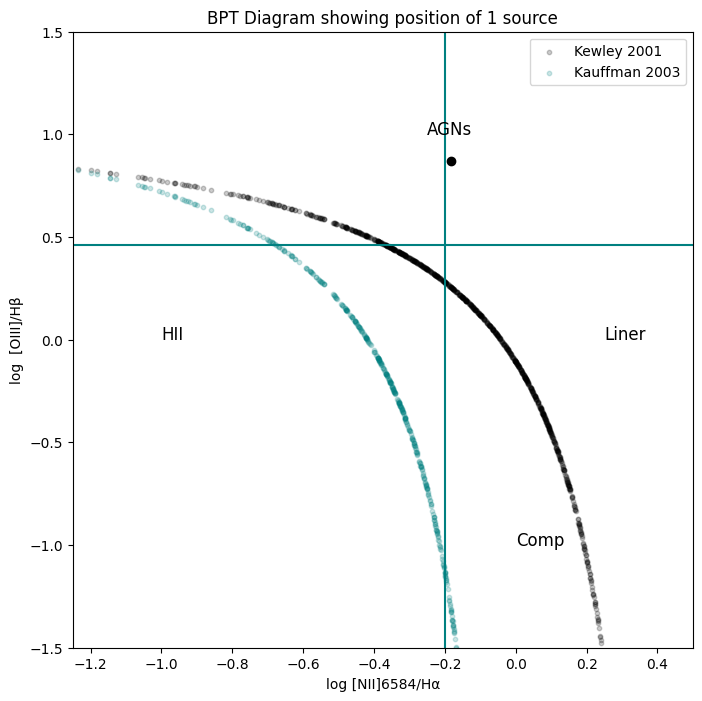

In [22]:

    plt.figure(figsize=(8,8))

    y7=(0.61/(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux'])-0.47)) +1.19
    plt.scatter(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux']),y7, label='Kewley 2001', c='black',s=10, alpha=0.2)
            
    y8=(0.61/(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux'])-0.05)) +1.3
    plt.scatter(np.log10(df6['nii_6584_flux']/df6['h_alpha_flux']),y8, label='Kauffman 2003', c='teal',s=10, alpha=0.2)#np.log10(y1))


    plt.axhline(y=0.46, color='teal')#, linestyle='--')
    plt.axvline(x=-0.2, color='teal')#, linestyle='--')


    plt.text( 0.0,-1.0, 'Comp',fontsize=12)
    plt.text( 0.25,0.0, 'Liner',fontsize=12)
    plt.text( -0.25,1.0, 'AGNs',fontsize=12)
    plt.text( -1.0,0.0, 'HII',fontsize=12)
    
    p1=np.log10(1745.936/2661.47)
    p2=np.log10(4433.455/596.2051)
    plt.scatter(p1,p2, c='black')


    plt.xlim(-1.25,0.5)
    plt.ylim(-1.5,1.5)

    plt.xlabel("log [NII]6584/Hα")
    plt.ylabel("log  [OIII]/Hβ")
    plt.title("BPT Diagram showing position of 1 source")

   
    
    plt.legend()   

    
    
          
            
    